In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import pandas as pd

In [6]:
data =  pd.read_csv("../data/melb_data.csv")
data.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


Variables that have more than 25 unique values will be counted as numeric values

#2. Variables in dataset

The format goes like this:
VariableName: variable types
Variable description

Rooms: Categorical Qualitative, Ordinal, Discrete
Number of rooms

Price: Numeric, Ratio, Continuous
Price in dollars

Method: Categorical, Nominal, Discrete
S - property sold; SP - property sold prior; PI - property passed in; PN - sold prior not disclosed; SN - sold not disclosed; NB - no bid; VB - vendor bid; W - withdrawn prior to auction; SA - sold after auction; SS - sold after auction price not disclosed. N/A - price or highest bid not available.

Type: Categorical, Nominal, Discrete
br - bedroom(s); h - house,cottage,villa, semi,terrace; u - unit, duplex; t - townhouse; dev site - development site; o res - other residential.

SellerG: Categorical, Nominal, Discrete (This is to check whether there is any relationship with agents and price sold, better agents have better price)
Real Estate Agent by their names

Date:
Date sold

Distance: Numeric, Ratio, Continuous
Distance from CBD

Regionname: Categorical, Nominal, Discrete
General Region (West, North West, North, North east etc)

Propertycount: Numeric, Interval, Continuous
Number of properties that exist in the suburb.

Bedroom2 : Categorical, Ordinal, Discrete
Scraped # of Bedrooms (from different source)

Bathroom: Categorical, Ordinal, Discrete
Number of Bathrooms

Car: Categorical, Ordinal, Discrete
Number of carspots

Landsize: Numeric, Interval, Continuous
Land Size

BuildingArea: Numeric, Interval, Continuous
Building Size

CouncilArea: Categorical, Nominal, Discrete
Governing council for the area

?Remove outliers

In [8]:
#mean = data['Price'].mean()
#SD = data['Price'].std()
#outlierHead = mean - 3*SD
#outlierTail = mean + 3*SD
#data.drop(data[(data.Price < outlierHead | data.Price > outlierTail)].index, inplace=True)
#data.describe()

In [9]:
#remove redundant and irrelevant attributes:
#Address has 13378 unique values, almost unique for each object. Description rather than category, also overlaps with latitude, longitude, regionname\n",
#method simply describes if property was put on auction or sold
data['Address'].value_counts()

36 Aberfeldie St    3
2 Bruce St          3
5 Charles St        3
53 William St       3
14 Arthur St        3
                   ..
16 Alleford St      1
2/1073 Centre Rd    1
14 Columbia St      1
21 Hardy Ct         1
6 Agnes St          1
Name: Address, Length: 13378, dtype: int64

In [10]:
#remove redundant and irrelevant attributes
#postcode is redundant as it is essentially the same as address/longitude and latitude.
data['Postcode'].value_counts()

3073.0    359
3020.0    306
3121.0    292
3040.0    290
3046.0    284
         ... 
3340.0      1
3158.0      1
3808.0      1
3777.0      1
3793.0      1
Name: Postcode, Length: 198, dtype: int64

In [11]:
#remove redundant and irrelevant attributes:
#method simply describes how the data is obtained (sold, auction), is irrelevant
data = data.drop(columns=['Address','Method','Postcode'])

In [12]:
#data cleaning: checking for duplicates
data.duplicated().sum()

0

In [13]:
#data cleaning: missing values
data.isna().sum()
#missing values for car can be removed as very few, buildingarea, yearbuilt, councilarea needs replacement

Suburb              0
Rooms               0
Type                0
Price               0
SellerG             0
Date                0
Distance            0
Bedroom2            0
Bathroom            0
Car                62
Landsize            0
BuildingArea     6450
YearBuilt        5375
CouncilArea      1369
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64

In [14]:
# percentage of null values for Car, BuildingArea, YearBuilt and CouncilArea

null_a = data['Car'].isnull().sum()/data['Car'].size
print(f'Car: {null_a*100}%')
null_b = data['BuildingArea'].isnull().sum()/data['BuildingArea'].size
print(f'BuildingArea: {null_b*100}%')
null_c = data['CouncilArea'].isnull().sum()/data['CouncilArea'].size
print(f'CouncilArea: {null_c*100}%')
null_d = data['YearBuilt'].isnull().sum()/data['YearBuilt'].size
print(f'YearBuilt: {null_d*100}%')

Car: 0.45655375552282773%
BuildingArea: 47.49631811487481%
CouncilArea: 10.08100147275405%
YearBuilt: 39.58026509572901%


?Drop or impute missing data

In [15]:
# Since the percentage of null values is much more than 30 percent, the BuildingArea is a sparse column. 
#knn

In [16]:
#data cleaning: missing values
data = data.dropna(subset=['Car'])
data.reset_index(drop=True, inplace=True)
data['BuildingArea'] = data['BuildingArea'].fillna(data['BuildingArea'].median())
data['YearBuilt'] = data['YearBuilt'].fillna(data['YearBuilt'].median())
data['CouncilArea'] = data['CouncilArea'].fillna(data['CouncilArea'].mode()[0])

In [17]:
#data transformation: yearbuilt to age. for scaling as age is a ratio feature while yearbuilt is interval. no sure if there is a diff
data['BuildingAge'] = 2018-data['YearBuilt']
data = data.drop(columns=['YearBuilt'])

In [18]:
#creating features from date sold
data['Date'] = pd.to_datetime(data['Date'])
data['Year_Sold'] = data['Date'].dt.year
data['Month_Sold'] = data['Date'].dt.month
data['Day_Sold'] = data['Date'].dt.day
data['DayOfWeek_Sold'] = data['Date'].dt.dayofweek
data = data.drop(columns=['Date'])
data[['Year_Sold', 'Month_Sold', 'Day_Sold', 'DayOfWeek_Sold']].head()

C:\Users\shiyi\AppData\Local\Temp\ipykernel_26420\273771942.py:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  data['Date'] = pd.to_datetime(data['Date'])


,Year_Sold,Month_Sold,Day_Sold,DayOfWeek_Sold
0,2016,3,12,5
1,2016,4,2,5
2,2017,4,3,0
3,2017,4,3,0
4,2016,4,6,2


In [19]:
#encoding categorical attributes. categorical attributes need to be encoded as ml models often do not accept text categories.
#suburb, SellerG, CouncilArea are nominal, have high cardinality - binary encoder used for dimensionality concerns. if one-hot is used, dimensionality will be high, causing curse of dimensionality.
#one-hot encoder for other nominal features - better performance than binary (https://www.diva-portal.org/smash/get/diva2:1259073/FULLTEXT01.pdf)
categorical = ['Suburb','Type','SellerG','CouncilArea','Regionname']
for x in categorical:
    print(x,":",data[x].nunique())

Suburb : 314
Type : 3
SellerG : 268
CouncilArea : 33
Regionname : 8


In [20]:
#encoding categorical attributes
from category_encoders.binary import BinaryEncoder
encoder = BinaryEncoder(cols=['Suburb','SellerG','CouncilArea'], return_df=True)
data_encoded = encoder.fit_transform(data)
type_encoded = pd.get_dummies(data['Type'], prefix='Type')
regionname_encoded = pd.get_dummies(data['Regionname'], prefix='Regionname')
data_encoded = pd.concat([data_encoded, type_encoded, regionname_encoded], axis='columns').drop(['Type','Regionname'],axis=1)

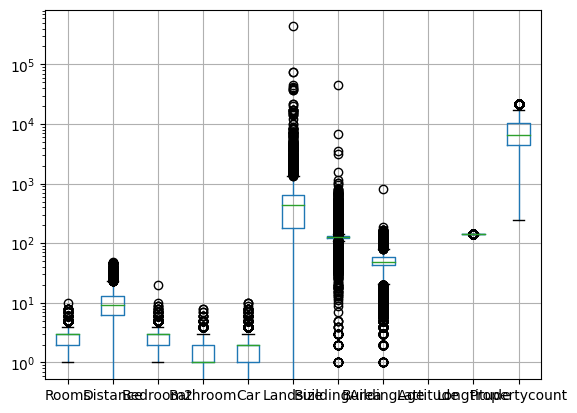

In [21]:
#data transformation: standardization, not normalization, as data contains many outliers
numeric_data = data[['Rooms','Distance','Bedroom2','Bathroom','Car','Landsize','BuildingArea','BuildingAge','Lattitude','Longtitude','Propertycount']]
plt.yscale("log")
plt.xticks(rotation='vertical')
numeric_data.boxplot()
plt.show()

In [22]:
#train test split before scaling as test set must not influence scaling. train set is randomly selected 80% of data, test set is 20%, 
#train/test set x contains attributes, train/test set y contains labels
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(data_encoded, test_size=0.2, random_state=42)
train_set_y = train_set['Price']
train_set_x = train_set.drop(columns=['Price'])
test_set_y = test_set['Price']
test_set_x = test_set.drop(columns=['Price'])

In [23]:
#scaling numerical attributes for ml training, see lecture notes on preprocessing for reason
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
train_set_x_scaled = train_set_x.copy()
test_set_x_scaled = test_set_x.copy()
numeric_columns = ['Rooms','Distance','Bedroom2','Bathroom','Car','Landsize','BuildingArea','BuildingAge','Lattitude','Longtitude','Propertycount']
train_set_x_scaled[numeric_columns] = scaler.fit_transform(train_set_x_scaled[numeric_columns])
test_set_x_scaled[numeric_columns] = scaler.transform(test_set_x_scaled[numeric_columns])

?SelectKBest or PCA

In [24]:
#from sklearn.feature_selection import SelectKBest
#from sklearn.feature_selection import f_classif

#fs = SelectKBest(score_func=f_classif, k=15)
# apply feature selection
#X_selected = fs.fit_transform(x, y)
#print(X_selected.shape)

In [25]:
#pca for dimensionality reduction
from sklearn.decomposition import PCA
pca = PCA(n_components=0.95)
train_set_x_reduced = pd.DataFrame(pca.fit_transform(train_set_x_scaled))
test_set_x_reduced = pd.DataFrame(pca.transform(test_set_x_scaled))
print(pca.explained_variance_ratio_)
print(pca.components_)

[0.707235   0.08289542 0.0341261  0.02769424 0.01734122 0.01321804
 0.01261113 0.01075598 0.0105524  0.00894697 0.0082485  0.00747291
 0.00476768 0.0043182 ]
[[-8.06342871e-04 -1.26975489e-03  4.10284425e-04 -2.21105349e-05
   1.10337944e-04  2.81125277e-04  3.52003169e-04  1.18699508e-03
   5.21214080e-04 -2.54273325e-03 -3.46154882e-05  1.07707499e-04
  -2.74206596e-04 -5.40778511e-04 -7.32085129e-04 -3.66831416e-04
  -3.03259586e-04  1.29147915e-05  3.16818812e-04 -4.41552611e-03
  -2.38384281e-03  2.47207024e-03 -1.56339790e-03  1.11206723e-03
   1.65546850e-03  3.12991816e-06 -5.05036298e-04 -1.61540458e-03
  -7.54661463e-04  1.28220478e-03 -6.64089643e-04 -1.13269181e-03
  -5.76204617e-04  4.59477591e-04 -1.26604363e-03  2.21443312e-03
   3.93934006e-03 -9.92376109e-01 -1.22903608e-01 -1.15560820e-03
   7.67981547e-06  1.14792838e-03 -3.59959527e-04 -1.19594556e-04
  -8.00452388e-04  1.65918748e-05 -4.98556262e-05  1.33990368e-03
   4.60388408e-05 -7.26722939e-05]
 [-1.37381782e-

In [26]:
#with categorical features encoded
data_encoded.to_csv('../data/data_encoded.csv',index=False)
#randomly selected 80% of data for training
train_set.to_csv('../data/train_set.csv',index=False)
#20% for testing
test_set.to_csv('../data/test_set.csv',index=False)
#attributes of training set
train_set_x.to_csv('../data/train_set_x.csv',index=False)
#numerical attributes of training set scaled
train_set_x_scaled.to_csv('../data/train_set_x_scaled.csv',index=False)
#attributes of training set after pca, use this for model training
train_set_x_reduced.to_csv('../data/train_set_x_reduced.csv',index=False)
#labels of training set, use this for model training
train_set_y.to_csv('../data/train_set_y.csv',index=False)
#attributes of test set
test_set_x.to_csv('../data/test_set_x.csv',index=False)
#numerical attributes of test set scaled
test_set_x_scaled.to_csv('../data/test_set_x_scaled.csv',index=False)
#attributes of test set after pca, use this for model testing
test_set_x_reduced.to_csv('../data/test_set_x_reduced.csv',index=False)
#labels of test set, use this for model testing
test_set_y.to_csv('../data/test_set_y.csv',index=False)